In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os

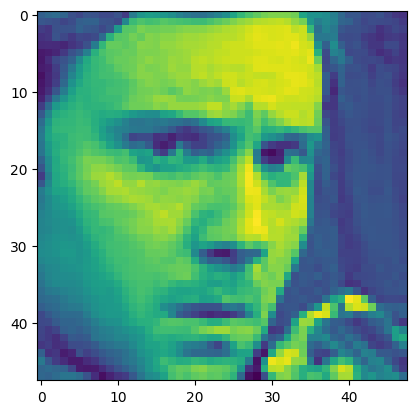

In [2]:
img = plt.imread('../raw_data/images/train/angry/0.jpg')
plt.imshow(img)
plt.show()

In [3]:
picture_size = 48
folder_path = '../raw_data/images/'

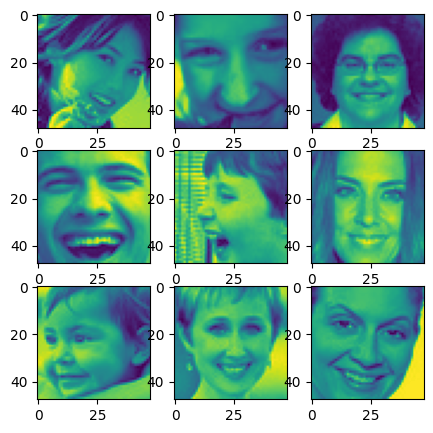

In [4]:
expression = 'happy'
#plt.style.use('dark_background')
plt.figure(figsize= (5,5))
for i in range(1, 10, 1):
    plt.subplot(3,3,i)
    img = plt.imread(folder_path+"train/"+expression+"/"+
                  os.listdir(folder_path + "train/" + expression)[i])
    plt.imshow(img)   
plt.show()

In [5]:
def plot_exp(expression):
    plt.style.use('dark_background')
    plt.figure(figsize= (5,5))
    for i in range(1, 10, 1):
        plt.subplot(3,3,i)
        img = plt.imread(folder_path+"train/"+expression+"/"+
                      os.listdir(folder_path + "train/" + expression)[i])
        plt.imshow(img)   
    plt.show()

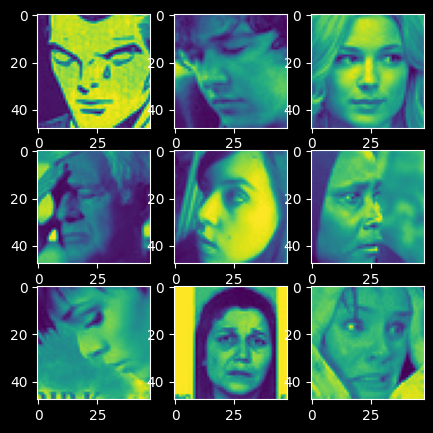

In [6]:
plot_exp('sad')

In [7]:
import os
import numpy as np
import pandas as pd

from matplotlib.pyplot import imread

import matplotlib.pyplot as plt
%matplotlib inline

def load_data(path, expression):
    nb_circles = 100
    nb_triangles = 100
    
    X, y = [], []
    
    for dirname, _, filenames in os.walk(f'../raw_data/images/train/{expression}'):
        for filename in filenames:
            X.append(imread(os.path.join(dirname, filename))[:, :])
            y.append(expression) 
        
    c = list(zip(X, y))
    np.random.shuffle(c)
    X, y = zip(*c)
    print(expression)
    print(len(X))
        
    return np.array(X), np.array(y)

In [8]:
X = np.array([])
y = np.array([])#'disgust',
expressions = ['angry', 'fear', 'happy', 'neutral', 'sad', 'surprise']
for expression in expressions:
    #load data by expression
    X_exp, y_exp = load_data("../raw_data", expression)
    
    if len(X)>0:
        #append them in one array 
        X_exp = np.append(X, X_exp, axis=0)
    
    X = X_exp

angry
3993
fear
4103
happy
7164
neutral
4982
sad
4938
surprise
3205


In [9]:
X_exp.shape

(28385, 48, 48)

In [17]:
3993+4103+7164+4982+4938+3205

28385

In [11]:
X_exp = X_exp/255.

In [12]:
X_exp = np.expand_dims(X_exp, axis=-1)

In [13]:
X_exp.shape

(28385, 48, 48, 1)

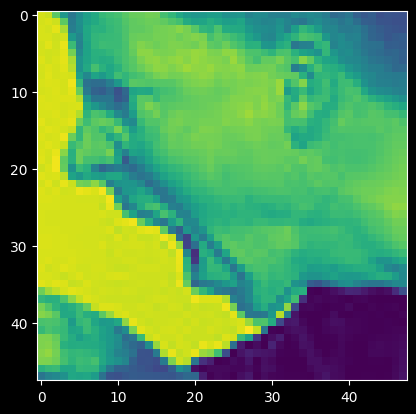

In [15]:
plt.imshow(X_exp[0])   
plt.show()

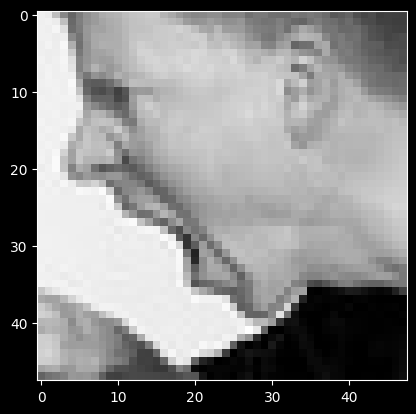

In [16]:
plt.imshow(X_exp[0], cmap = plt.cm.gray)

In [20]:
from tensorflow.keras.models import Sequential

2022-10-29 18:12:29.348872: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-10-29 18:12:29.348940: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-10-29 18:12:30.242694: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-10-29 18:12:48.178728: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2022-10-29 18:12:48.178869: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: ca

In [23]:
from tensorflow.keras.optimizers import Adam,SGD,RMSprop
from keras.layers import Dense,Input,Dropout,GlobalAveragePooling2D,Flatten,Conv2D,BatchNormalization,Activation,MaxPooling2D

no_of_classes = 6

model = Sequential()

#1st CNN layer
model.add(Conv2D(64,(3,3),padding = 'same',input_shape = (48,48,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

#2nd CNN layer
model.add(Conv2D(128,(5,5),padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout (0.25))

#3rd CNN layer
model.add(Conv2D(512,(3,3),padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout (0.25))

#4th CNN layer
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())

#Fully connected 1st layer
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))


# Fully connected layer 2nd layer
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(no_of_classes, activation='softmax'))



opt = Adam(learning_rate = 0.0001)
model.compile(optimizer=opt,loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 48, 48, 64)        640       
                                                                 
 batch_normalization_6 (Batc  (None, 48, 48, 64)       256       
 hNormalization)                                                 
                                                                 
 activation_6 (Activation)   (None, 48, 48, 64)        0         
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 24, 24, 64)       0         
 2D)                                                             
                                                                 
 dropout_6 (Dropout)         (None, 24, 24, 64)        0         
                                                                 
 conv2d_5 (Conv2D)           (None, 24, 24, 128)      